# Prediction - it's rain or not?

## Imports

In [1]:
import pandas as pd    
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from kneed import KneeLocator

from aing import *
from cfica import *
from clustering import *

import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None  # default='warn'


## Data Loading

In [2]:
# Replace Pluie by the exact file name Exo_Crews... 
data=pd.read_csv("Pluie.csv",sep=";")

# verify your number of observations and columns
# change separator if needed ',' or '\t' ...
print(data.shape[0], "observations (lines) by ", data.shape[1], "features (columns)")



576 observations (lines) by  14 features (columns)


## Data exploration

In [3]:
data.head(5)


,times,sens,TSL_mean,RSL_mean,Rgage,freq,length,cfakr,cfbkr,link,gage,dist,code,company
0,2021-08-28 00:10:00,290 A-B,5.0,-52.7,0.0,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange
1,2021-08-28 00:25:00,290 A-B,5.0,-52.7,0.0,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange
2,2021-08-28 00:40:00,290 A-B,5.0,-52.7,0.0,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange
3,2021-08-28 00:55:00,290 A-B,5.0,-52.8,0.0,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange
4,2021-08-28 01:10:00,290 A-B,5.0,-52.9,0.0,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange


In [4]:
data.tail(5)

,times,sens,TSL_mean,RSL_mean,Rgage,freq,length,cfakr,cfbkr,link,gage,dist,code,company
571,2021-09-02 22:55:00,290 A-B,5.7,-53.7,4.8,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange
572,2021-09-02 23:10:00,290 A-B,5.0,-53.6,1.6,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange
573,2021-09-02 23:25:00,290 A-B,5.0,-53.4,0.8,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange
574,2021-09-02 23:40:00,290 A-B,5.0,-53.4,0.0,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange
575,2021-09-02 23:55:00,290 A-B,5.0,-53.4,0.8,14.5,1.02,0.0473,1.1022,10G_MPR_NDOGBONG_3 - MPR_MISSOKE_UNIVERSITE_1,Meteo_IUT,0.193579,290,Orange


In [5]:
# detection of Meta-Data 
# a Meta-data could be a unique value, or reduced number (Quality code)
metaValue = 1
card = []
for i in range(data.shape[1]):
    card.append(len(data.iloc[:, i].unique()))

# extraction of non Meta information
subset = np.array(card) > metaValue
df = data.loc[:, subset]

print(df.head(n=3))
print("...")
print(df.tail(n=2))


                 times  TSL_mean  RSL_mean  Rgage
0  2021-08-28 00:10:00       5.0     -52.7    0.0
1  2021-08-28 00:25:00       5.0     -52.7    0.0
2  2021-08-28 00:40:00       5.0     -52.7    0.0
...
                   times  TSL_mean  RSL_mean  Rgage
574  2021-09-02 23:40:00       5.0     -53.4    0.0
575  2021-09-02 23:55:00       5.0     -53.4    0.8


In [6]:
# date identification
df.loc[:, 'times']=pd.to_datetime(df.loc[:,"times"], format="%Y-%m-%d %H:%M:%S")
df.set_index("times", inplace=True)
df.loc[:, 'TRSL_mean'] = df.copy()['RSL_mean'] - df.copy()['TSL_mean']

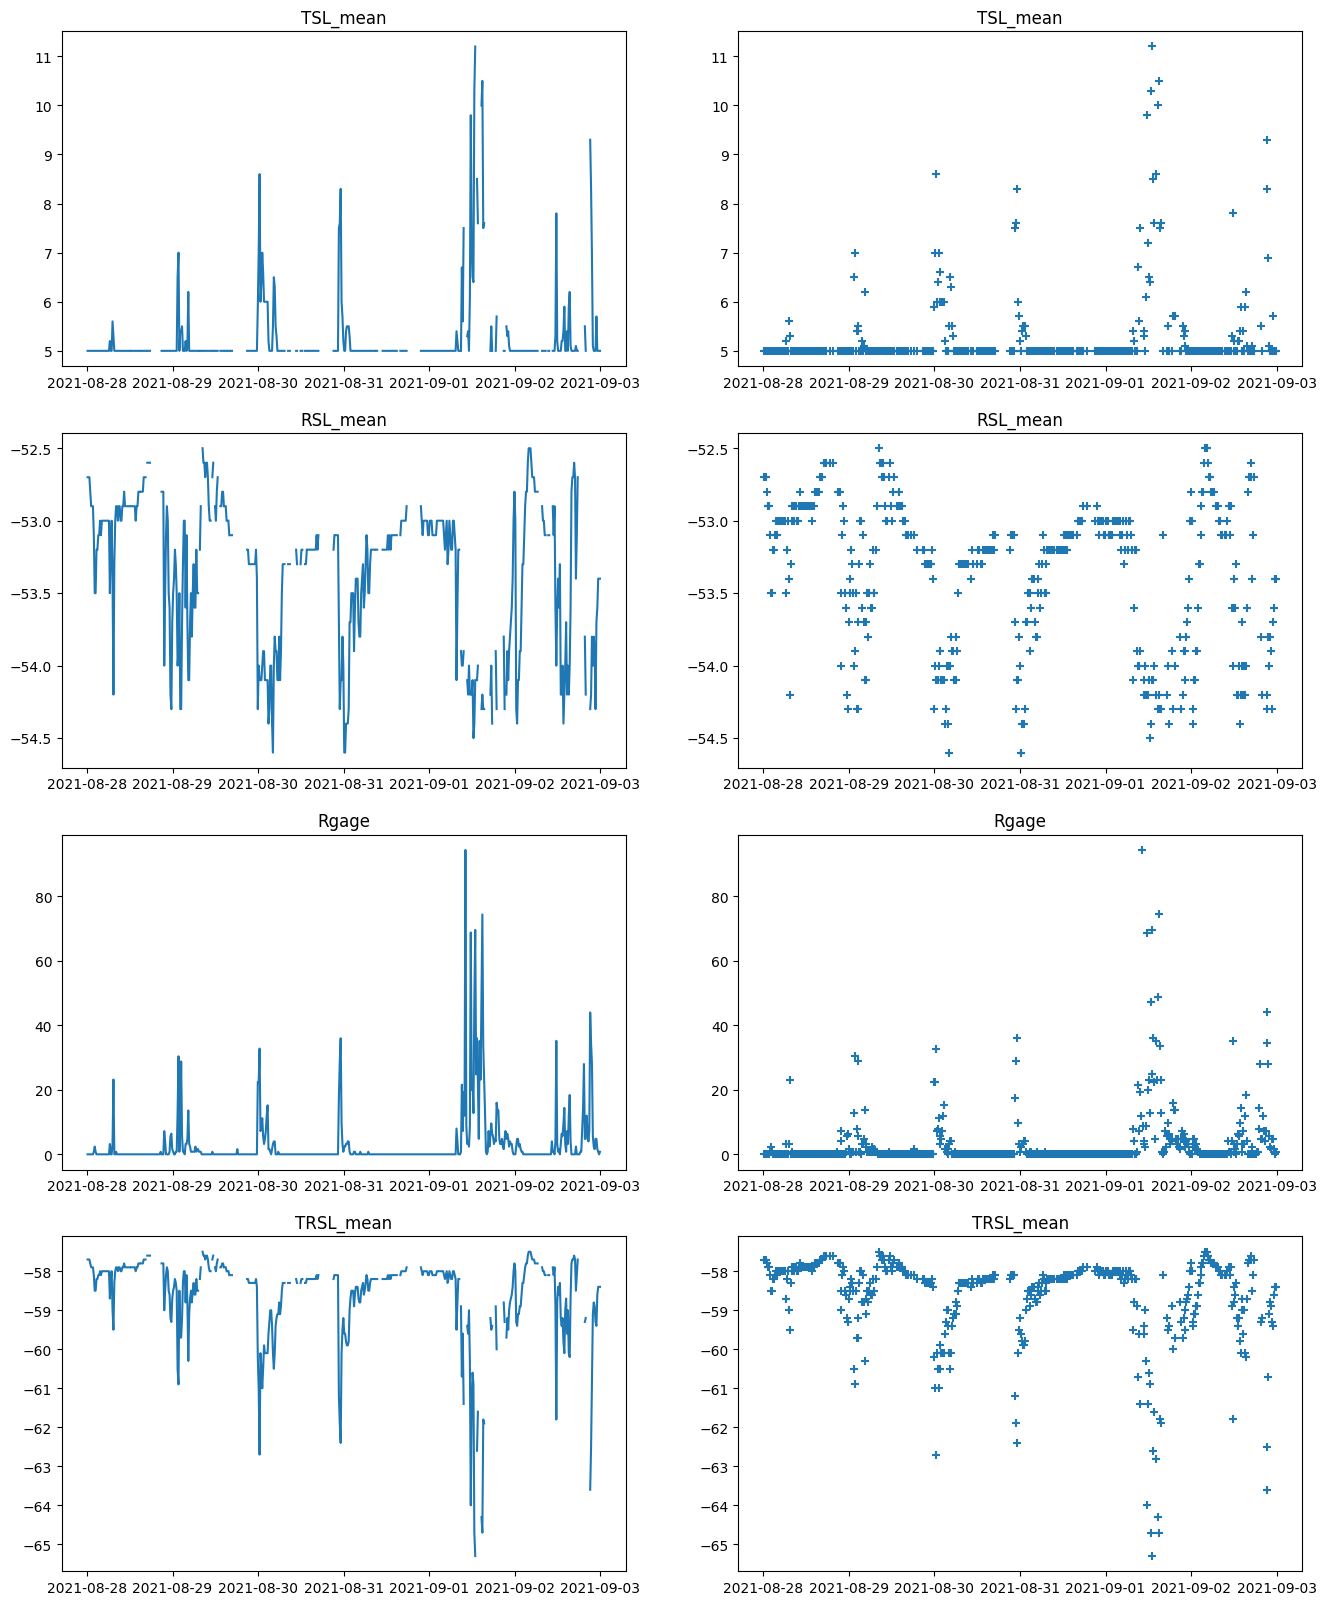

In [7]:
fig, axs = plt.subplots(len(df.columns), 2, figsize=(16, 5 * len(df.columns)))

for i, col in enumerate(df.columns):
    axs[i, 0].plot(df[col])
    axs[i, 0].set_title(col)
    axs[i, 1].scatter(df.index, df[col], marker='+')
    axs[i, 1].set_title(col)

plt.show()


In [8]:
# correlation information
df.corr().round(2)

,TSL_mean,RSL_mean,Rgage,TRSL_mean
TSL_mean,1.00,-0.48,0.95,-0.92
RSL_mean,-0.48,1.00,-0.53,0.78
Rgage,0.95,-0.53,1.00,-0.90
TRSL_mean,-0.92,0.78,-0.90,1.00


## Identification of Pattern by unsupervised approach

In [9]:
#remove observations with NA information 
df.dropna(inplace=True)
df.describe()


,TSL_mean,RSL_mean,Rgage,TRSL_mean
count,451.000000,451.000000,451.000000,451.000000
mean,5.260089,-53.355211,3.249667,-58.615299
std,0.814482,0.505954,9.118773,1.147213
min,5.000000,-54.600000,0.000000,-65.300000
25%,5.000000,-53.750000,0.000000,-58.800000
50%,5.000000,-53.200000,0.000000,-58.200000
75%,5.000000,-53.000000,1.600000,-58.000000
max,11.200000,-52.500000,74.400000,-57.500000


In [10]:
# Normalisation

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

,TSL_mean,RSL_mean,Rgage,TRSL_mean
0,-0.319685,1.296438,-0.356767,0.798732
1,-0.319685,1.296438,-0.356767,0.798732
2,-0.319685,1.296438,-0.356767,0.798732
3,-0.319685,1.098573,-0.356767,0.711467
4,-0.319685,0.900707,-0.356767,0.624203


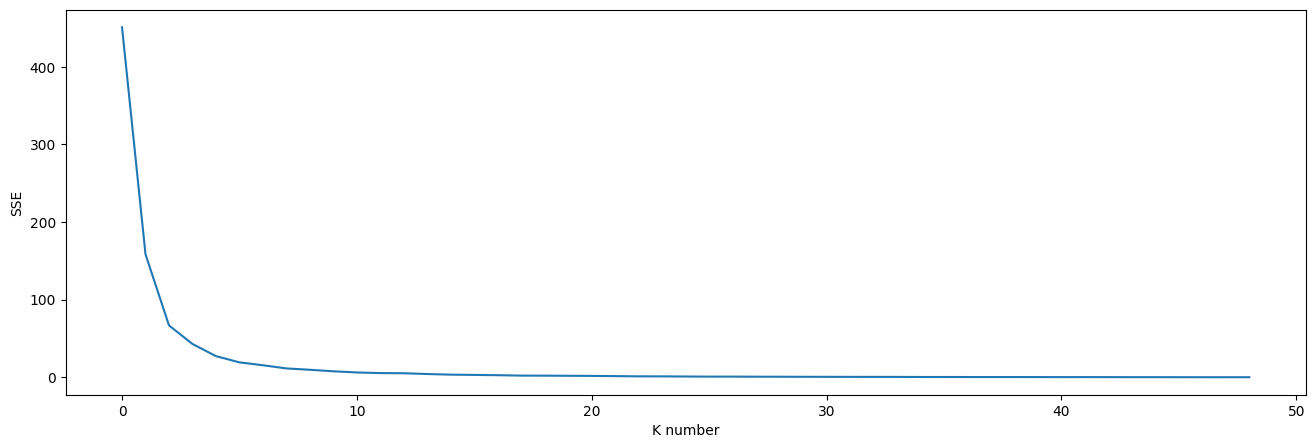

The optimal value of k is: 5


In [11]:
#File 1 identify pattern structure without temporal information
sse = []
Kmax = 50
for k in range(1, Kmax):
    kmeans = KMeans(init = "random", n_clusters = k, n_init = 10, max_iter=300, random_state = 42)
    kmeans.fit(df_scaled[['TRSL_mean']])
    sse.append(kmeans.inertia_)
plt.figure(figsize= (16,5))
plt.xlabel("K number")
plt.ylabel("SSE")
plt.plot(sse)    
plt.show()
kl = KneeLocator(range(1, Kmax), sse, curve="convex", direction="decreasing")
print(f"The optimal value of k is: {kl.elbow}")


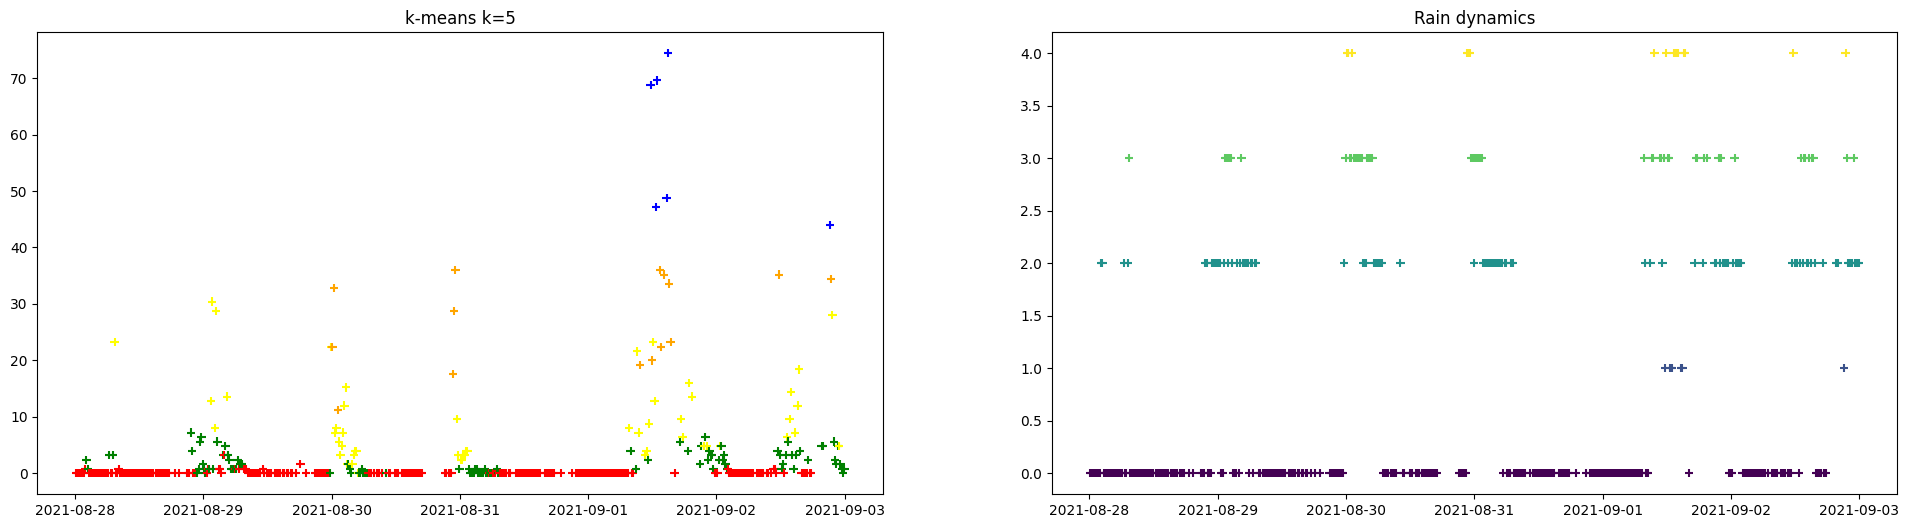

In [12]:
km1 = KMeans(init="random", n_clusters=kl.elbow, n_init=10, max_iter=300, random_state=42)
km1.fit(df_scaled.loc[:, ['TRSL_mean']])

fig, axs = plt.subplots(1, 2, figsize=(24, 6))
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'black', 'cyan']
axs[0].scatter(df.index, df['Rgage'], c=[colors[i] for i in km1.labels_], marker='+')
axs[0].set_title(f"k-means k={kl.elbow}", fontdict={"fontsize": 12})

axs[1].scatter(df.index, km1.labels_, c=km1.labels_, marker='+')
axs[1].set_title("Rain dynamics")

plt.show()


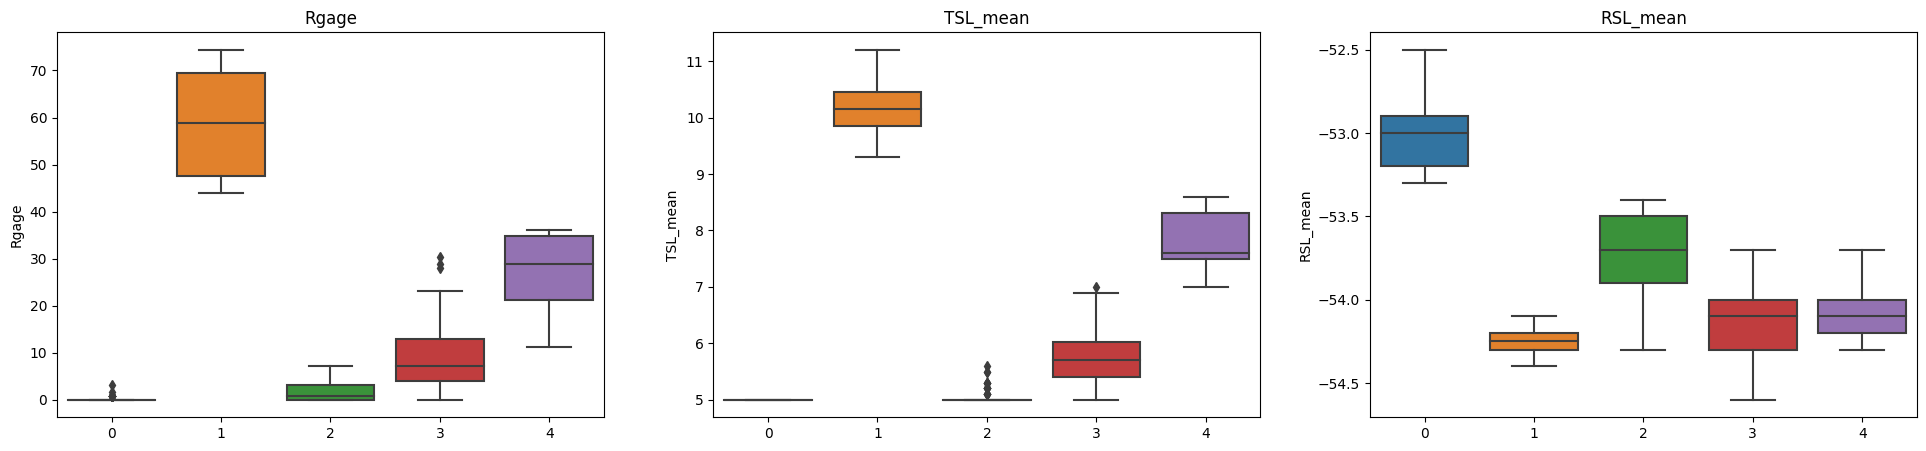

In [13]:
labels = km1.labels_

fig, axs = plt.subplots(1, 3, figsize=(24, 5))

sns.boxplot(y=df.Rgage, x=labels, ax=axs[0])
axs[0].set_title("Rgage")

sns.boxplot(y=df.TSL_mean, x=labels, ax=axs[1])
axs[1].set_title("TSL_mean")

sns.boxplot(y=df.RSL_mean, x=labels, ax=axs[2])
axs[2].set_title("RSL_mean")

plt.show()


# Incremental Clustering

In [14]:
import matplotlib.pyplot as plt

def plot_data(df, y, labels, title):
    fig, axs = plt.subplots(1, 2, figsize=(24, 5))
    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'cyan', 'black']
    axs[0].scatter(df.index, y, c=[colors[i] for i in labels], marker='+')
    axs[0].set_xlabel("DateTime")
    axs[0].set_ylabel("Rain Gauge - RGage")
    axs[0].set_title(title)
    axs[1].scatter(df.index, labels, c=[colors[i] for i in labels], marker='+')
    axs[1].set_title("Labels")
    axs[1].set_xlabel("DateTime")
    axs[1].set_ylabel("labels")
    plt.show()


In [15]:
X=df.drop(['Rgage', 'TSL_mean', 'RSL_mean'],axis=1)
y=df.Rgage



In [16]:
clustering =  ProposedApproach(X.values, 150, 50)
clustering.fit()
clustering.cluster_outliers()
labels1 = clustering.labels

new cluster
new cluster


In [17]:
cfica = CFICA(X.values, 50, 50, 2, 1)
cfica.fit()
labels2 = cfica.labels

Number of clusters:  9
Labels:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([15,  1,  1,  5,  4, 17,  1,  2,  4]))
After merging:  2
After merging:  2
After merging:  3
After merging:  3
After merging:  3
After merging:  4
After merging:  4
After merging:  4
After merging:  4


In [18]:
aing = AING(5)
aing.fit(X.values)
print("Len of the graph: ", len(aing.G))
point_to_neuron = {}
somme = 0
for i in range(len(aing.G)):
    # Handle points assigned to neuron i
    for point in aing.G[i]['points']:
        point_to_neuron[tuple(point)] = i
        somme += 1
        
    # Handle centroid of neuron i
    centroid = aing.G[i]['w']
    somme += 1
    point_to_neuron[tuple(centroid)] = i

labels3 = [point_to_neuron[tuple(point)] for point in X.values]



Len of the graph:  5


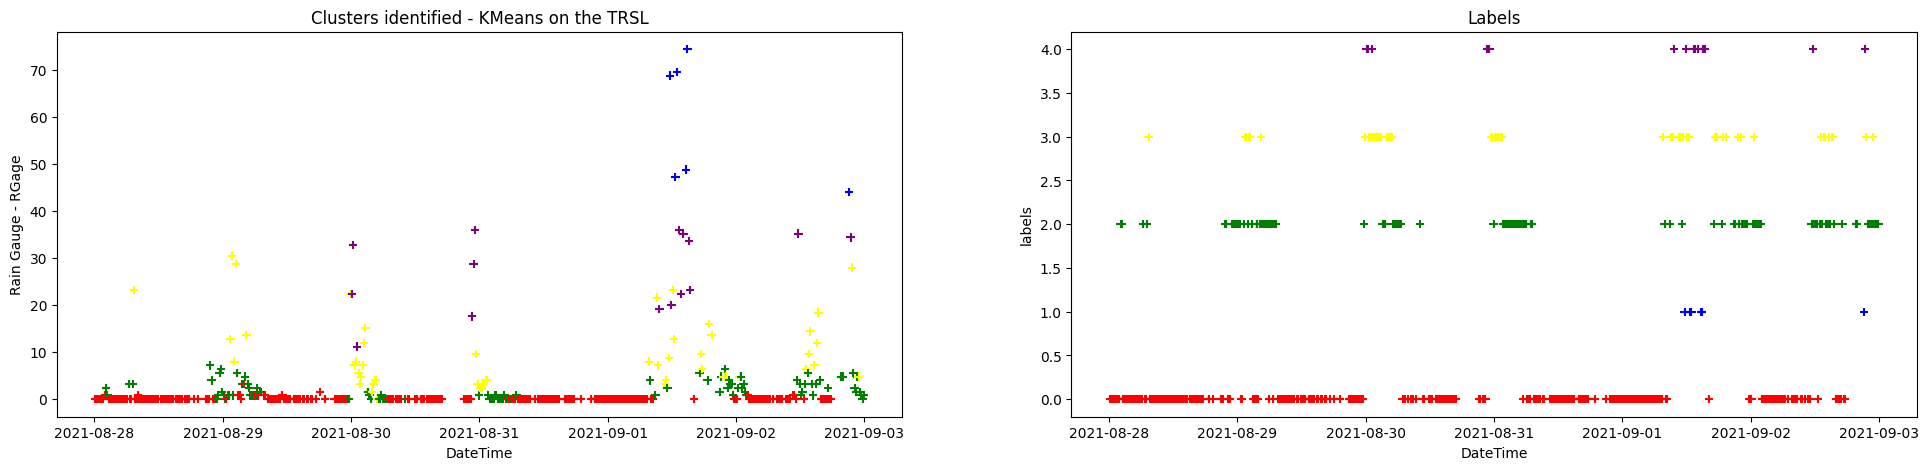

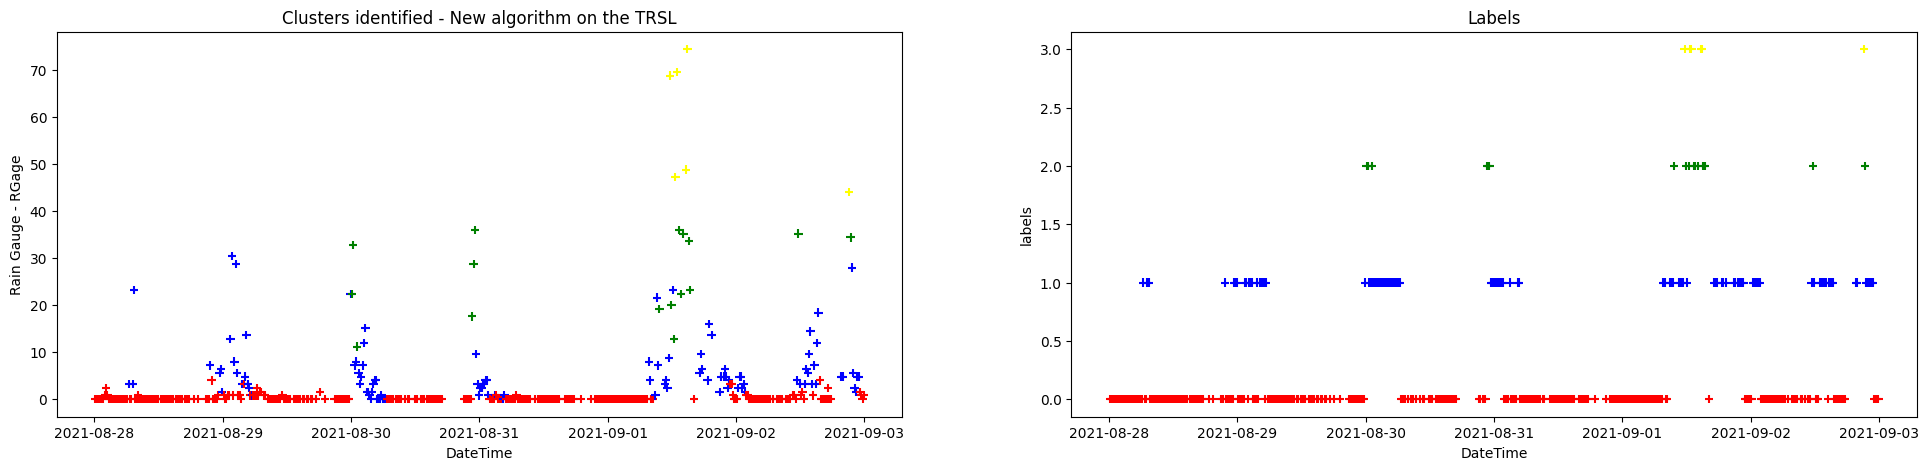

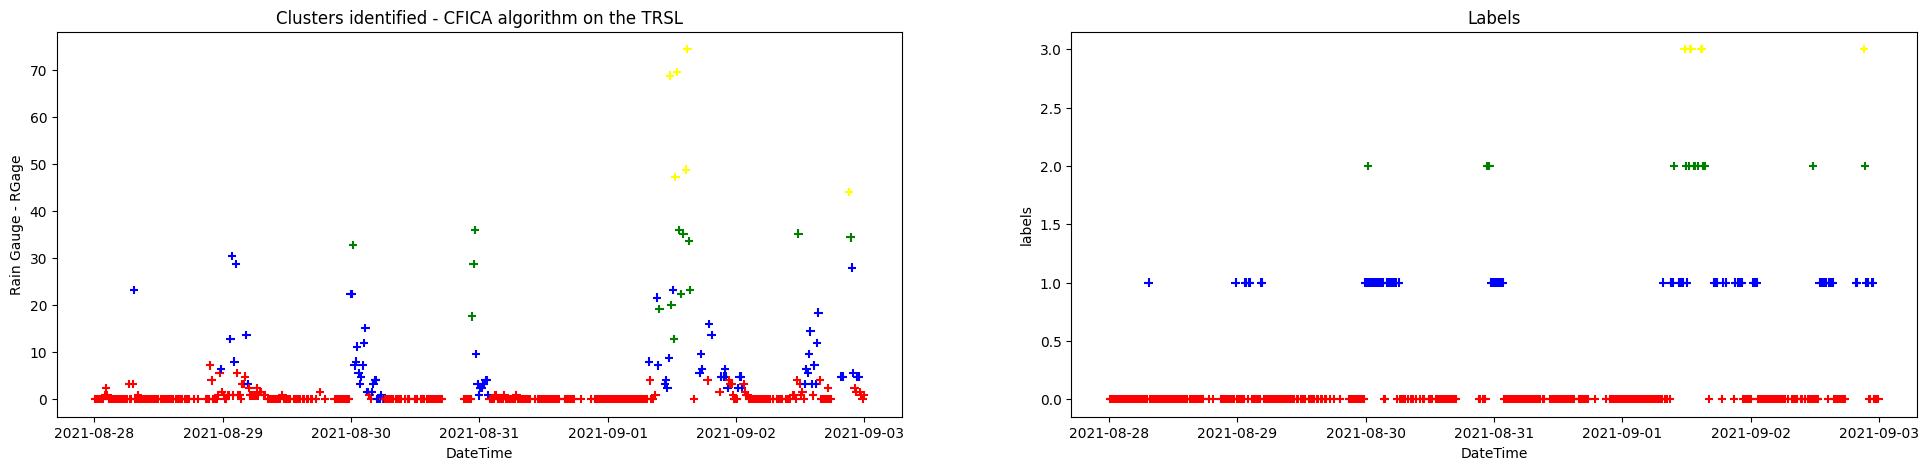

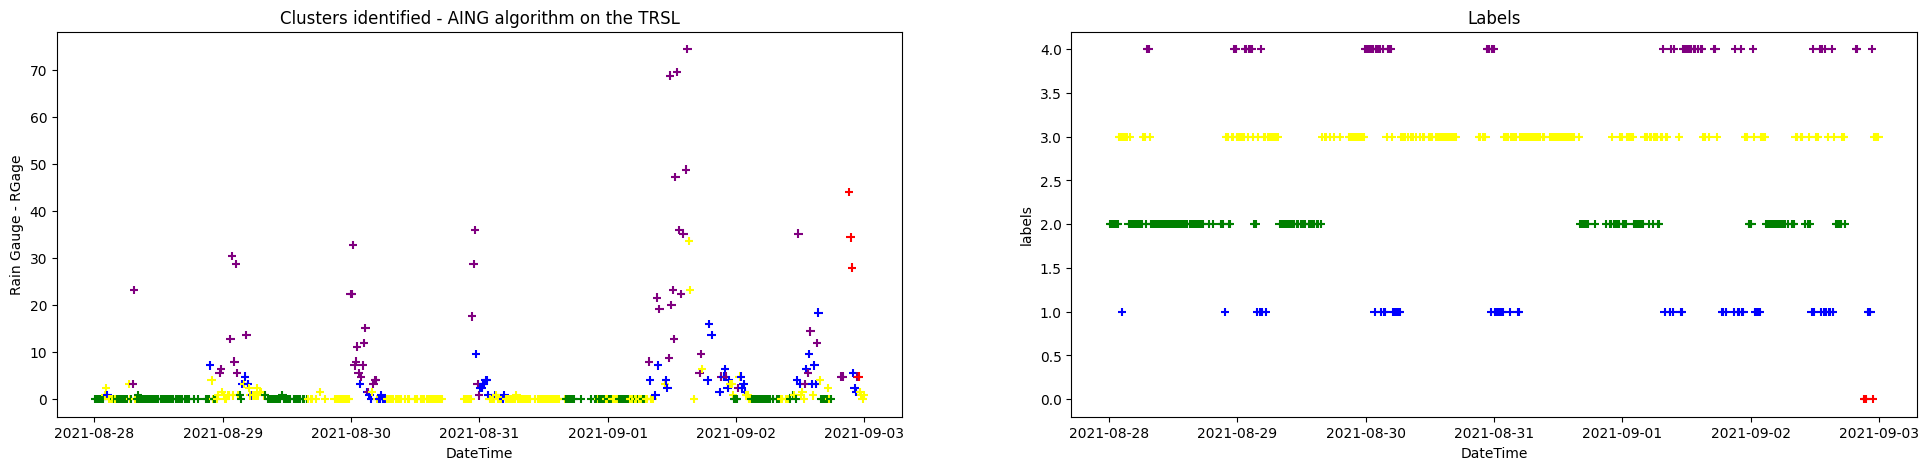

In [19]:
plot_data(df, y, km1.labels_, "Clusters identified - KMeans on the TRSL")
plot_data(df, y, labels1, "Clusters identified - New algorithm on the TRSL")
plot_data(df, y, labels2, "Clusters identified - CFICA algorithm on the TRSL")
plot_data(df, y, labels3, "Clusters identified - AING algorithm on the TRSL")



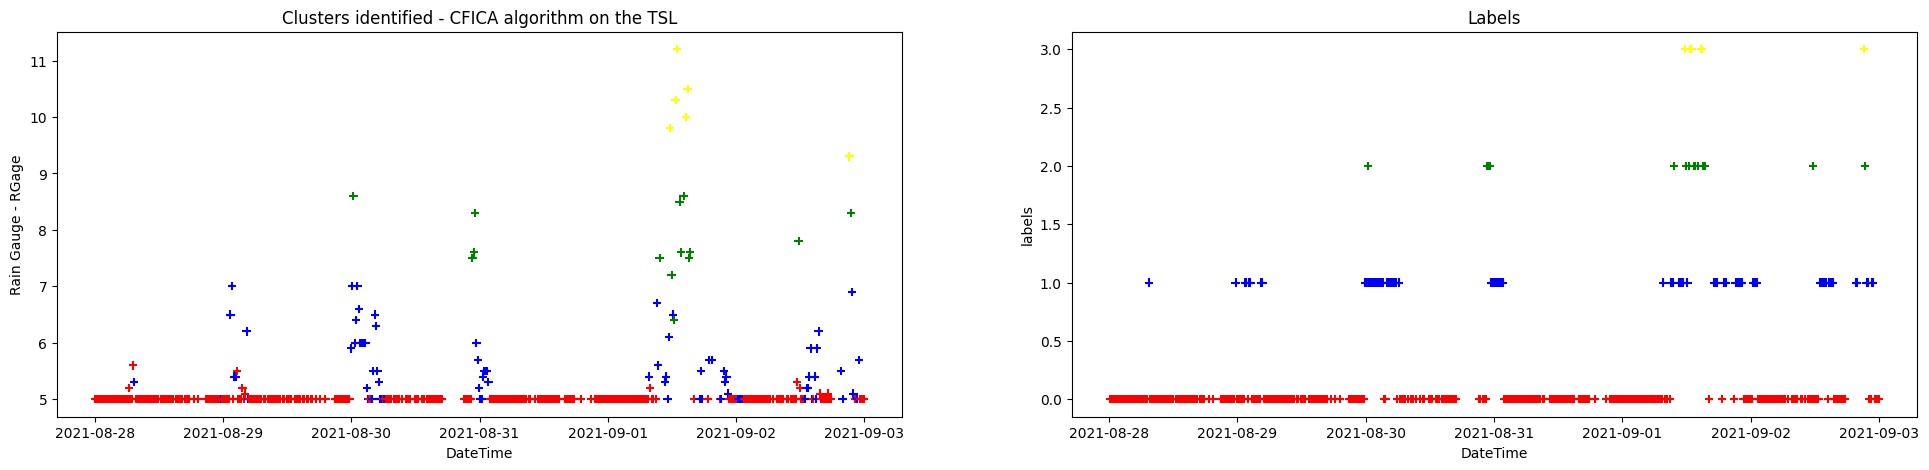

In [20]:
plot_data(df, df['TSL_mean'], labels2, "Clusters identified - CFICA algorithm on the TSL")

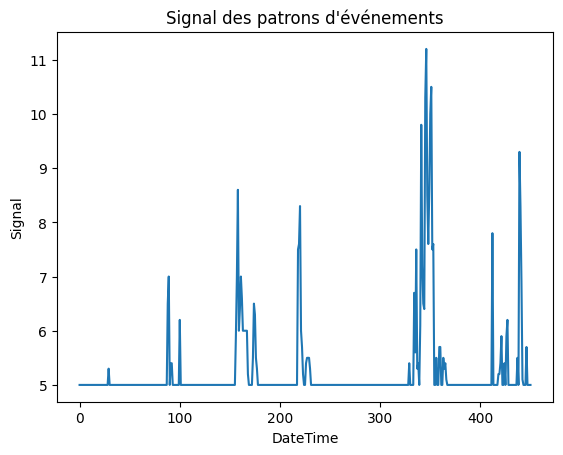

In [21]:
import matplotlib.pyplot as plt

# Créer une liste pour stocker les données du signal
signal = []

# Parcourir les données des labels
for i in range(len(labels2)):
    # Si le label change de 0 vers un autre label
    if i > 0 and labels2[i] != 0:
        # Ajouter l'amplitude correspondante dans la colonne TSL_mean au signal
        signal.append(df['TSL_mean'].iloc[i])
    else:
        # Sinon, ajouter 0 au signal
        signal.append(5)

# Créer un graphique en utilisant les données du signal
plt.plot(signal)
plt.xlabel('DateTime')
plt.ylabel('Signal')
plt.title('Signal des patrons d\'événements')
plt.show()


In [22]:
# Créer un nouveau DataFrame pour stocker les données des événements de pluie
rain_events = pd.DataFrame(columns=['Event', 'Amplitudes'])

# Initialiser les variables pour stocker les données des événements de pluie
event = 0
amplitudes = []

# Parcourir les données des labels
for i in range(len(labels2)):
    # Si le label change de 0 vers un autre label
    if i > 0 and labels2[i] != 0:
        # Ajouter l'amplitude correspondante dans la colonne TSL_mean aux amplitudes de l'événement en cours
        amplitudes.append(df['TSL_mean'].iloc[i])
    else:
        # Si les amplitudes de l'événement en cours ne sont pas vides
        if len(amplitudes) > 0:
            # Vérifier si les labels suivants sont également 0
            next_labels_zero = True
            for j in range(i, min(i+10, len(labels2))):
                if labels2[j] != 0:
                    next_labels_zero = False
                    break
            # Si les labels suivants sont également 0
            if next_labels_zero:
                # Ajouter les données de l'événement en cours au DataFrame
                rain_events.loc[event] = [event, amplitudes]
                # Réinitialiser les variables pour le prochain événement
                event += 1
                amplitudes = []

# Afficher la table des événements de pluie
display(rain_events)




,Event,Amplitudes
0,0,[5.3]
1,1,"[5.0, 6.5, 7.0, 5.4, 5.4, 6.2, 5.0]"
2,2,"[5.9, 7.0, 8.6, 6.0, 6.4, 7.0, 6.6, 6.0, 6.0, ..."
3,3,"[7.5, 7.6, 8.3, 6.0, 5.7, 5.2, 5.0, 5.0, 5.4, ..."
4,4,"[5.4, 6.7, 5.6, 7.5, 5.3, 5.4, 5.0, 6.1, 9.8, ..."
5,5,"[7.8, 5.0, 5.2, 5.2, 5.4, 5.9, 5.0, 5.4, 5.0, ..."


In [23]:
# Trouver la longueur maximale des amplitudes
max_length = rain_events['Amplitudes'].str.len().max()

# Créer un nouveau DataFrame avec des colonnes séparées pour chaque amplitude
rain_events_sep = pd.DataFrame(columns=['Event'] + [f'a{i+1}' for i in range(max_length)])

# Parcourir les données des événements de pluie
for i, row in rain_events.iterrows():
    # Ajouter les données de l'événement au DataFrame
    rain_events_sep.loc[i, 'Event'] = row['Event']
    for j, amp in enumerate(row['Amplitudes']):
        rain_events_sep.loc[i, f'a{j+1}'] = amp

# Remplacer les valeurs manquantes par 0
rain_events_sep.fillna(0, inplace=True)

# Enregistrer le DataFrame dans un fichier CSV
rain_events_sep.to_csv('rain_events_sep.csv', index=False)


In [46]:
from dtw import *

# Sélectionner les colonnes des amplitudes
amplitude_cols = [col for col in rain_events_sep.columns if col.startswith('a')]

# Créer une matrice pour stocker les distances DTW entre les amplitudes des événements
dist_matrix = np.zeros((len(rain_events_sep), len(rain_events_sep)))

# Parcourir les données des événements de pluie
for i, row1 in rain_events_sep.iterrows():
    for j, row2 in rain_events_sep.iterrows():
        # Calculer la distance DTW entre les amplitudes des deux événements
        alignment = dtw(row1[amplitude_cols], row2[amplitude_cols], keep_internals=True)
        # Stocker la distance dans la matrice
        dist_matrix[i, j] = alignment.distance

# Créer un DataFrame pour stocker la matrice de similarité
distance_matrix = pd.DataFrame(dist_matrix, columns=rain_events_sep['Event'], index=rain_events_sep['Event'])

# Afficher la matrice de similarité
display(distance_matrix)


Event,0,1,2,3,4,5
Event,,,,,,
0,0.0,4.6,18.1,10.0,221.6,15.9
1,4.6,0.0,11.8,10.0,173.7,15.9
2,18.1,11.8,0.0,8.5,93.9,22.0
3,10.0,10.0,8.5,0.0,146.4,15.9
4,221.6,173.7,93.9,146.4,0.0,109.6
5,15.9,15.9,22.0,15.9,109.6,0.0


In [50]:
from sklearn.preprocessing import MinMaxScaler

# Flatten the distance matrix into a 1D array
distances = distance_matrix.values.flatten()

# Create a MinMaxScaler object to scale the distances
scaler = MinMaxScaler()

# Scale the distances using min-max normalization
scaled_distances = scaler.fit_transform(distances.reshape(-1, 1)).flatten()

# Reshape the scaled distances back into a matrix
scaled_distances_matrix = pd.DataFrame(scaled_distances.reshape(distance_matrix.shape), columns=distance_matrix.columns, index=distance_matrix.index)

# Display the scaled distance matrix
display(scaled_distances_matrix)


Event,0,1,2,3,4,5
Event,,,,,,
0,0.000000,0.020758,0.081679,0.045126,1.000000,0.071751
1,0.020758,0.000000,0.053249,0.045126,0.783845,0.071751
2,0.081679,0.053249,0.000000,0.038357,0.423736,0.099278
3,0.045126,0.045126,0.038357,0.000000,0.660650,0.071751
4,1.000000,0.783845,0.423736,0.660650,0.000000,0.494585
5,0.071751,0.071751,0.099278,0.071751,0.494585,0.000000


In [51]:
from sklearn.cluster import KMeans

# Créer un objet KMeans avec le nombre de clusters souhaité
kmeans = KMeans(n_clusters=3)

# Ajuster l'algorithme K-means à la matrice de similarité
kmeans.fit(scaled_distances_matrix)

# Obtenir les étiquettes des clusters pour chaque événement
labels = kmeans.labels_

# Afficher les étiquettes des clusters
print(labels)


[0 0 2 2 1 2]


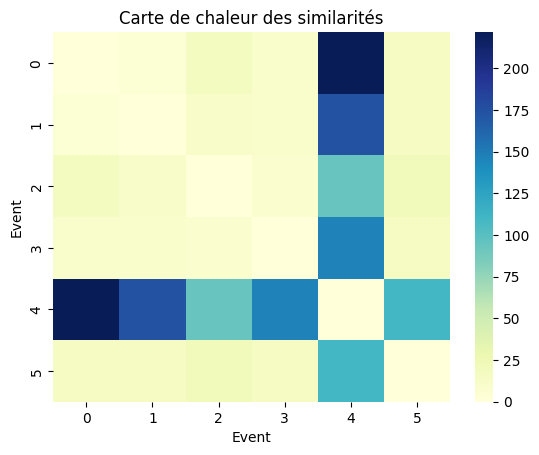

In [49]:
import seaborn as sns

# Créer une carte de chaleur en utilisant les données de la matrice de similarité
sns.heatmap(distance_matrix, cmap='YlGnBu')
plt.title('Carte de chaleur des similarités')
plt.show()


# DOUALA

In [42]:
df_douala = pd.read_csv('Douala/CML_Douala/L1_172.22.249.1P3.2-172.22.249.3P3.1_71A-B.csv', sep=';', parse_dates=['datetime'])

In [43]:
df_douala.head()

,datetime,direction,unique_link_id,length,frequency,TSL_min,TSL_mean,TSL_max,RSL_min,RSL_mean,RSL_max,Rgage,gage,dist_lnk_gage,link_name,calc_coeff_a,calc_coeff_b
0,2018-06-06 00:05:00,71 A-B,172.22.249.1P3.2-172.22.249.3P3.1,1.68,14.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lycee_NYALLA,0.952724,10G_MPR_NDOGPASSI_2 - MPR_LOGBABA-CAMTEL,0.0473,1.1022
1,2018-06-06 00:20:00,71 A-B,172.22.249.1P3.2-172.22.249.3P3.1,1.68,14.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lycee_NYALLA,0.952724,10G_MPR_NDOGPASSI_2 - MPR_LOGBABA-CAMTEL,0.0473,1.1022
2,2018-06-06 00:35:00,71 A-B,172.22.249.1P3.2-172.22.249.3P3.1,1.68,14.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lycee_NYALLA,0.952724,10G_MPR_NDOGPASSI_2 - MPR_LOGBABA-CAMTEL,0.0473,1.1022
3,2018-06-06 00:50:00,71 A-B,172.22.249.1P3.2-172.22.249.3P3.1,1.68,14.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lycee_NYALLA,0.952724,10G_MPR_NDOGPASSI_2 - MPR_LOGBABA-CAMTEL,0.0473,1.1022
4,2018-06-06 01:05:00,71 A-B,172.22.249.1P3.2-172.22.249.3P3.1,1.68,14.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lycee_NYALLA,0.952724,10G_MPR_NDOGPASSI_2 - MPR_LOGBABA-CAMTEL,0.0473,1.1022


In [44]:
df_douala.dropna(inplace=True)
df_douala.head()

,datetime,direction,unique_link_id,length,frequency,TSL_min,TSL_mean,TSL_max,RSL_min,RSL_mean,RSL_max,Rgage,gage,dist_lnk_gage,link_name,calc_coeff_a,calc_coeff_b
14106,2019-01-24 22:35:00,71 A-B,172.22.249.1P3.2-172.22.249.3P3.1,1.68,14.5,20.0,20.0,20.0,-37.0,-36.8,-36.6,0.0,Lycee_NYALLA,0.952724,10G_MPR_NDOGPASSI_2 - MPR_LOGBABA-CAMTEL,0.0473,1.1022
14107,2019-01-24 22:50:00,71 A-B,172.22.249.1P3.2-172.22.249.3P3.1,1.68,14.5,20.0,20.0,20.0,-37.1,-36.8,-36.6,0.0,Lycee_NYALLA,0.952724,10G_MPR_NDOGPASSI_2 - MPR_LOGBABA-CAMTEL,0.0473,1.1022
14108,2019-01-24 23:05:00,71 A-B,172.22.249.1P3.2-172.22.249.3P3.1,1.68,14.5,20.0,20.0,20.0,-37.1,-36.9,-36.7,0.0,Lycee_NYALLA,0.952724,10G_MPR_NDOGPASSI_2 - MPR_LOGBABA-CAMTEL,0.0473,1.1022
14109,2019-01-24 23:20:00,71 A-B,172.22.249.1P3.2-172.22.249.3P3.1,1.68,14.5,20.0,20.0,20.0,-37.1,-36.9,-36.7,0.0,Lycee_NYALLA,0.952724,10G_MPR_NDOGPASSI_2 - MPR_LOGBABA-CAMTEL,0.0473,1.1022
14110,2019-01-24 23:35:00,71 A-B,172.22.249.1P3.2-172.22.249.3P3.1,1.68,14.5,20.0,20.0,20.0,-37.2,-36.8,-36.6,0.0,Lycee_NYALLA,0.952724,10G_MPR_NDOGPASSI_2 - MPR_LOGBABA-CAMTEL,0.0473,1.1022


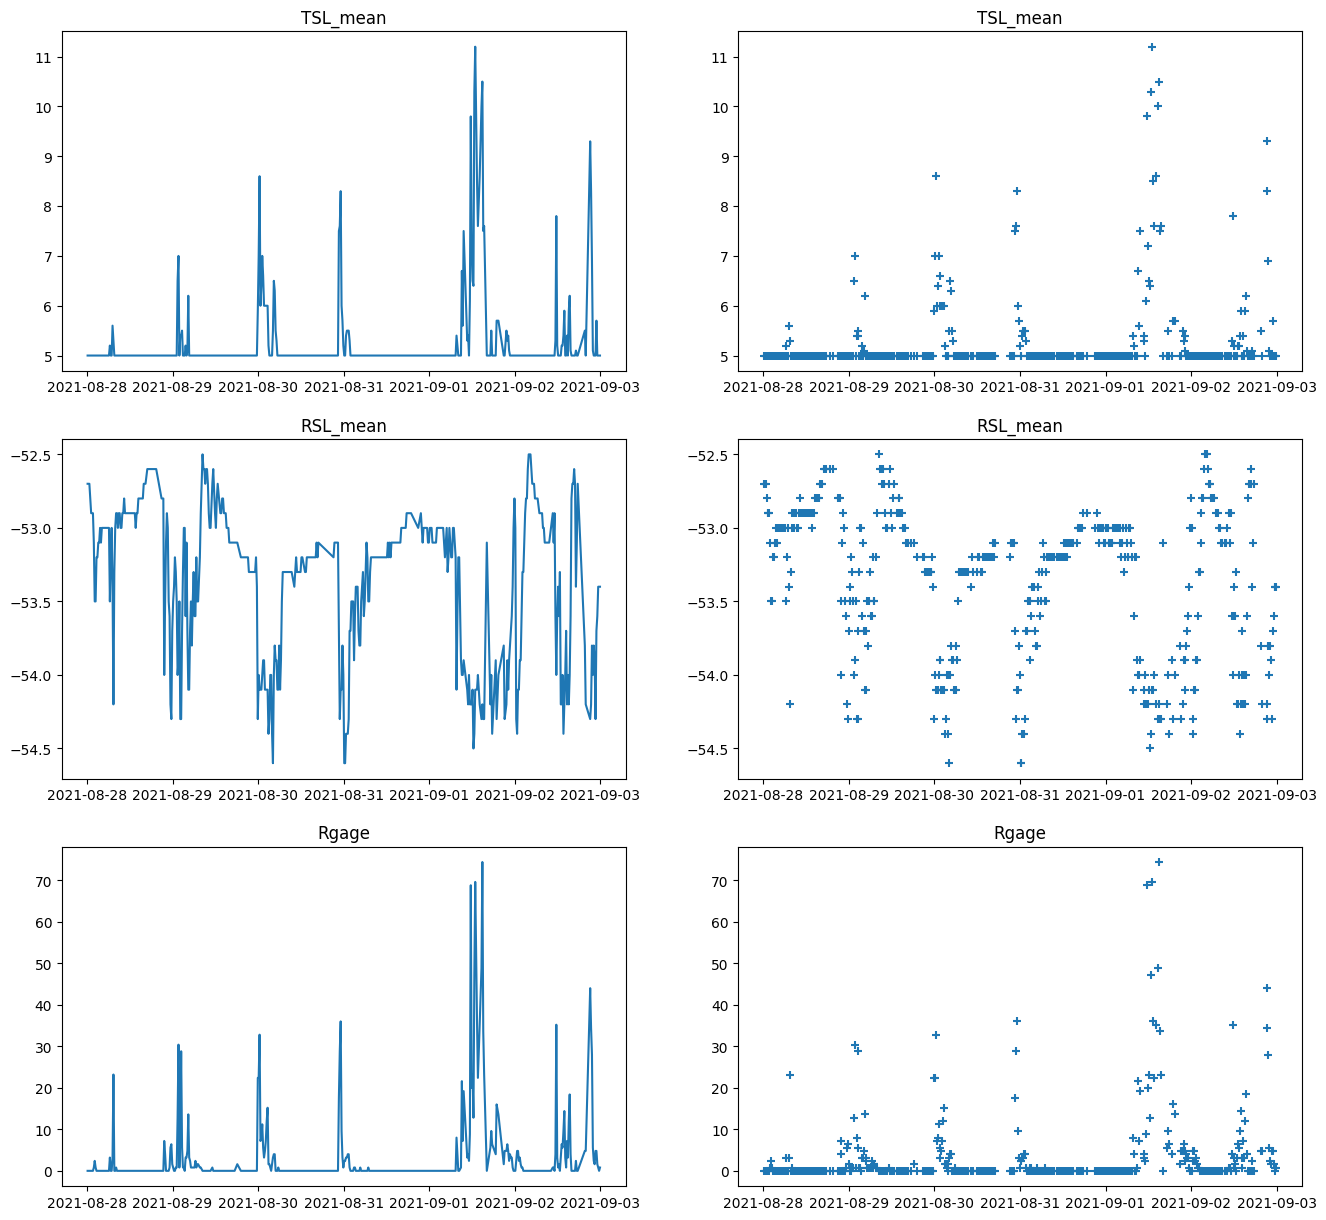

In [45]:
df_ = df[['TSL_mean', 'RSL_mean', 'Rgage']]
fig, axs = plt.subplots(len(df_.columns), 2, figsize=(16, 5 * len(df_.columns)))

for i, col in enumerate(df_.columns):
    axs[i, 0].plot(df_[col])
    axs[i, 0].set_title(col)
    axs[i, 1].scatter(df.index, df_[col], marker='+')
    axs[i, 1].set_title(col)

plt.show()
